In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

from shapely import wkt

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/usr/local/python/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


<Axes: >

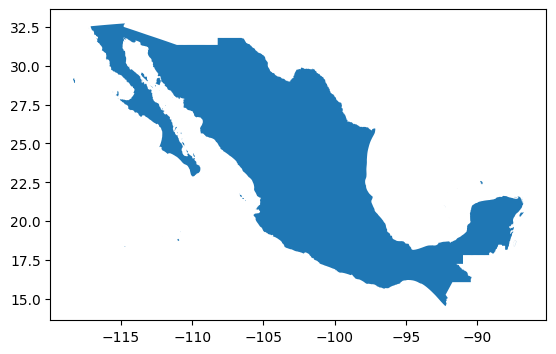

In [23]:
# Query municipalities
mun_schema = 'marco'
mun_table = 'mpos_2020'
query = f"SELECT * FROM {mun_schema}.{mun_table} "
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')

# Create Mexico shape
mun_gdf = mun_gdf.to_crs("EPSG:6372")
mun_buffer = mun_gdf.buffer(1)
mun_gdf_buffer = gpd.GeoDataFrame(mun_buffer)
mun_gdf_buffer.rename(columns={0:'geometry'},inplace=True)
mexico = mun_gdf_buffer.dissolve()
mexico = mexico.to_crs("EPSG:4326")

# Show
mexico.plot()

In [3]:
cell = 
#next_cells = [,'86b','86f','869','843','865','867','85d','85f','859','8f5']
#done_cells = ['80d','813','86d','815','83f','841','85b'

directory = f"../../../data/external/temporal_todocker/{cell}_buildings.csv"
buildings_tmp = pd.read_csv(directory)

buildings_tmp['geometry'] = buildings_tmp['geometry'].apply(wkt.loads)
buildings_gdf = gpd.GeoDataFrame(buildings_tmp, crs='epsg:4326')
buildings_gdf['cell'] = cell

aup.gdf_to_db_slow(buildings_gdf,'buildings_google_v3','google_buildings',if_exists="append")

In [ ]:
mexico_buildings = gpd.sjoin(buildings_gdf,mexico,how='inner')

# Show
print(mexico_buildings.shape)
mexico_buildings.head(2)